# Loppebefengte hunder og irreversibilitet

I kapittel 4.8 i boka (PCH) er loppebefengte hunder brukt for å illustrere det s˚akalte irreversibilitetsparadokset, dvs at fysikken på mikroskopisk nivå er tidsinvariant, mens på makronivå har tida en bestemt
retning. I denne oppgaven skal dere lage et program som reproduserer resultatene i kapittel 4.8, dvs et
program som simulerer tidsutviklingen av loppeantallet på to hunder. Forutsetningene er som følger: Når
hundene møtes, er det $N$ lopper på hund $A$ og ingen på hund $B$. Med jevne mellomrom, f.eks hvert sekund,
hopper en tilfeldig valgt loppe fra den ene hunden til den andre. Skriv programmet slik at dere kan plotte
tidsutviklingen $N_A(t)$ av antall lopper på hund $A$ [og/eller antall lopper på hund $B$, $N_B(t) = N − N_A(t)$].
Illustrer den kvalitative forskjellen på tidsutviklingen av loppefordelingen mellom de to hundene når antall
lopper er lite, middels og stort. I boka er det valgt $N = 6$ og $N = 20000$. Bruk tall omtrent så store for
et lite og et stort antall lopper, og dessuten et passende antall i mellom. Sammenlign med det analytiske
resultatet

$N_A(t) = \frac{N}{2}(1+e^{-ct})$

som framkommer ved ˚a anta et essensielt kontinuerlig loppeantall, og at ”hopperaten” fra en gitt hund er
proporsjonal med hvor mange lopper som befinner seg p˚a denne hunden (se boka). Hvorfor er $c = 1/N$ et
fornuftig valg dersom tidssteget $∆t$ settes lik $1$?

> Det er fornuftig å sette $c = 1/N$ siden sannsynligheten for at en spesifikk loppe kommer til å hoppe vil være proposjonal med $N$.




In [174]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# Definerer noen verdier
N1 = 10000
N2 = 100

t_end1 = 20000
t_end2 = 200
t_end3 = 5000
dt1 = np.linspace(0, t_end1, t_end1, endpoint = True)
dt2 = np.linspace(0, t_end2, t_end2, endpoint = True)
dt3 = np.linspace(0, t_end3, t_end3, endpoint = True)

A1 = np.zeros(t_end1)
A2 = np.zeros(t_end2)
A3 = np.zeros(t_end3)

c1 = 1/N1
c2 = 1/N2

# Setter første element lik alle lopper
A1[0] = N1
A2[0] = N2
A3[0] = N2

# Analytisk funksjon
def N_A(t, N, c):
    return N/2*(1+np.exp(-2*c*t))

In [176]:
# Simuleringsfunksjon
def simulation(t, l, N):
    for i in range(t - 1):
        hopper = np.random.randint(0, high=N) # Triller 'terning' fra 0 til N

        if hopper < l[i]: # Hvis terningkastet er under antall lopper på A ved t, mister hund A en loppe
            l[i + 1] = l[i] - 1
        else: # Ellers får den en loppe
            l[i + 1] = l[i] + 1

    return l

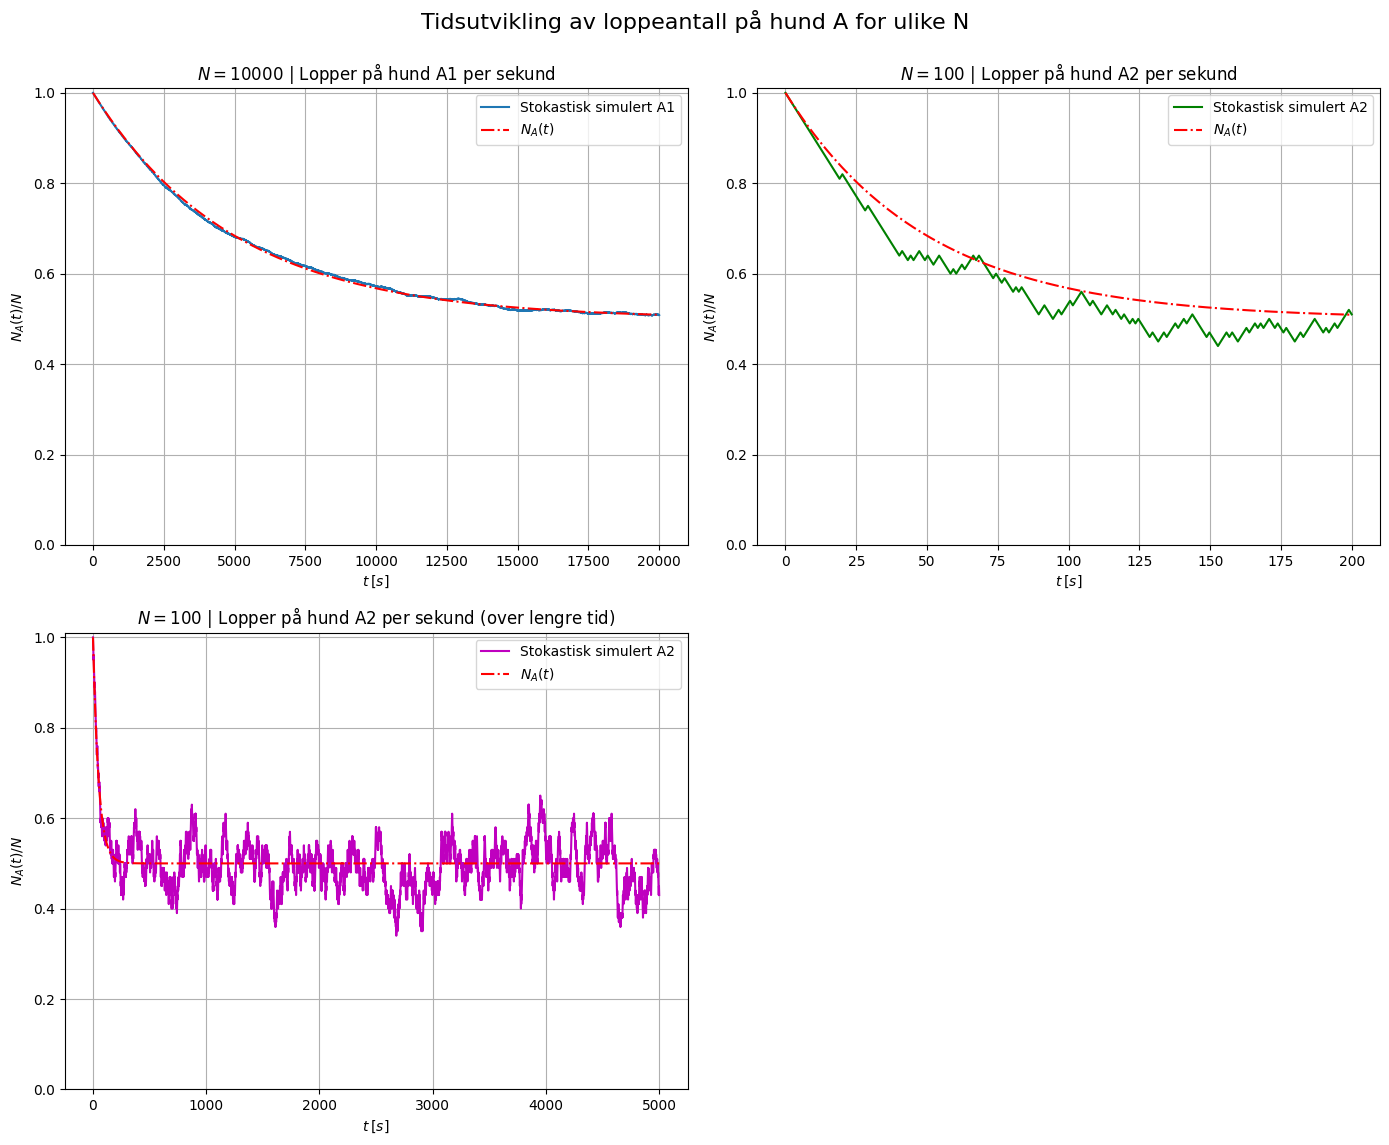

In [177]:
# Kjør simulering
A1_sim = simulation(t_end1, A1, N1)
A2_sim = simulation(t_end2, A2, N2)
A3_sim = simulation(t_end3, A3, N2)

# Gjør plots større
plt.figure(figsize=(14, 12))  # Økt størrelse for flere subplotter

# Plot for N1 = 10000
plt.subplot(2, 2, 1)
plt.plot(dt1, A1_sim / N1, label='Stokastisk simulert A1')
plt.plot(dt1, N_A(dt1, N1, c1) / N1, color='red', linestyle='dashdot', label='$N_A(t)$')
plt.xlabel('$t \: [s]$')
plt.ylabel('$N_A(t)/N$')
plt.title('$N = 10000$ | Lopper på hund A1 per sekund')
plt.ylim(0, 1.01)
plt.legend()
plt.grid()

# Plot for N2 = 100
plt.subplot(2, 2, 2)
plt.plot(dt2, A2_sim / N2, color='green', label='Stokastisk simulert A2')
plt.plot(dt2, N_A(dt2, N2, c2) / N2, color='red', linestyle='dashdot', label='$N_A(t)$')
plt.xlabel('$t \: [s]$')
plt.ylabel('$N_A(t)/N$')
plt.title('$N = 100$ | Lopper på hund A2 per sekund')
plt.ylim(0, 1.01)
plt.legend()
plt.grid()

# Plot for N2 = 100 over lengre tid
plt.subplot(2, 2, 3)
plt.plot(dt3, A3_sim / N2, color='m', label='Stokastisk simulert A2')
plt.plot(dt3, N_A(dt3, N2, c2) / N2, color='red', linestyle='dashdot', label='$N_A(t)$')
plt.xlabel('$t \: [s]$')
plt.ylabel('$N_A(t)/N$')
plt.title('$N = 100$ | Lopper på hund A2 per sekund (over lengre tid)')
plt.ylim(0, 1.01)
plt.legend()
plt.grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Felles tittel
plt.suptitle('Tidsutvikling av loppeantall på hund A for ulike N', fontsize=16)

# Vis plottene
plt.show()

> Vi kan se at ved et høyt antall lopper vil den stokastiske simuleringen tilnærme den analytiske funksjonen godt og ser klart at den konvergerer mot at antall lopper blir ca. 50%. Ved et færre antall lopper er det vanskeligere å se siden 1 loppe som hopper utgjør et større sprik i grafen. Hvis vi skal tolke dette termodynamisk kan vi si at hvis du har en stor mengde f.eks. gass molekyl vil molekylene sin f.eks. temperatur raskt fordele seg jevnt. Ved et lite antall molekyl er systemet mer utsatt for tilfeldige svingninger.